# Easy

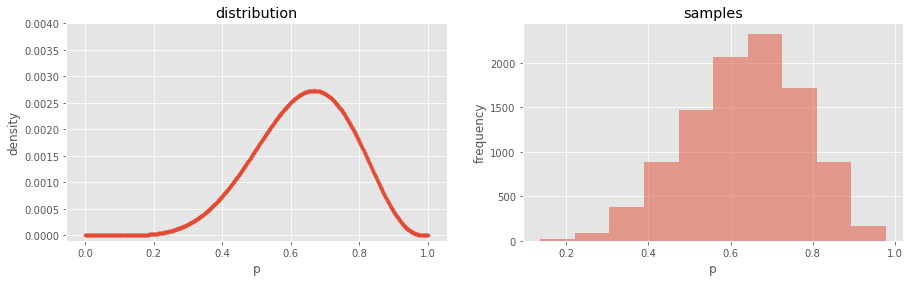

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


def grid_bin(n, W, T, prior=None):
    if prior is None:
        prior = np.ones(n)
    grid = np.linspace(0, 1, n)
    likelihood = ss.binom(T, grid).pmf(W)
    posterior = likelihood * prior
    posterior = posterior / posterior.sum()
    return posterior, grid

posterior, grid = grid_bin(1000, 6, 9)
samples = np.random.choice(grid, 10000, replace=True, p=posterior)

f, axarr = plt.subplots(1, 2)
f.set_figwidth(15)
axarr[0].scatter(grid, posterior, s=10, alpha=0.5)
axarr[0].set_ylim([-0.0001, 0.004])
axarr[0].set_xlabel('p')
axarr[0].set_ylabel('density')
axarr[0].set_title('distribution')
axarr[1].hist(samples, alpha=0.5)
axarr[1].set_xlabel('p')
axarr[1].set_ylabel('frequency')
axarr[1].set_title('samples')

In [2]:
# 3E1:
(samples < 0.2).mean()

0.0014

In [3]:
# 3E2:
(samples > 0.8).mean()

0.1203

In [4]:
# 3E3:
((samples > 0.2) & (samples < 0.8)).mean()

0.87829999999999997

In [5]:
# 3E4:
np.percentile(samples, 20)

0.51251251251251251

In [6]:
# 3E5:
np.percentile(samples, 80)

0.75895895895895971

In [7]:
# 3E6:
import pymc
pymc.utils.hpd(samples, 0.34)

array([ 0.52052052,  0.7957958 ])

In [8]:
# 3E7:
np.percentile(samples, 17), np.percentile(samples, 83)

(0.49449449449449456, 0.77377377377377377)

# Medium

(-0.0001, 0.004)

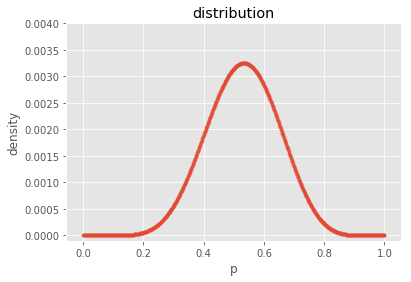

In [9]:
# 3M1:

posterior, grid = grid_bin(1000, 8, 15)
plt.scatter(grid, posterior, s=10, alpha=0.5)
plt.xlabel('p')
plt.ylabel('density')
plt.title('distribution')
plt.ylim([-0.0001, 0.004])

array([ 0.33733734,  0.72472472])

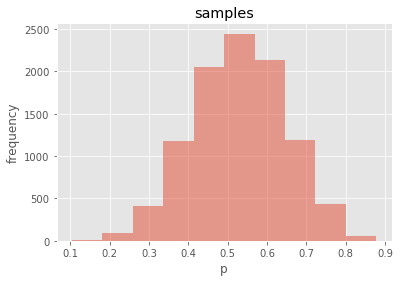

In [10]:
# 3M2:
# Take samples:
samples = np.random.choice(grid, 10000, replace=True, p=posterior)

plt.hist(samples, alpha=0.5)
plt.xlabel('p')
plt.ylabel('frequency')
plt.title('samples')

pymc.utils.hpd(samples, 0.1)

Inference = 0.0623567 | Real = 0.0811300333293


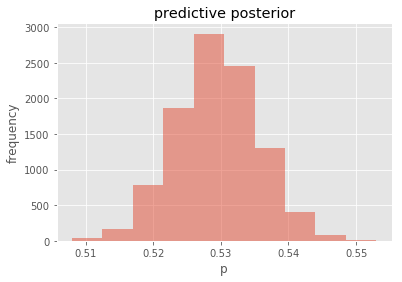

In [11]:
# 3M3:

p_samples = grid
p_samples.reshape((p_samples.size, 1))
results_samples = np.random.binomial(15, p_samples, (10000, p_samples.size))
predictive_posterior = results_samples.dot(posterior) / posterior.sum() / 15

plt.hist(predictive_posterior, alpha=0.5)
plt.xlabel('p')
plt.ylabel('frequency')
plt.title('predictive posterior')

# binomial(W = 8, T = 15, p = 0.7)
print("Inference =", (results_samples == 8).mean(), "| Real =", ss.binom.pmf(8, 15, 0.7))

In [12]:
# 3M4:

p_samples = grid
p_samples.reshape((p_samples.size, 1))
results_samples = np.random.binomial(9, p_samples, (10000, p_samples.size))

# binomial(W = 6, T = 9, p = 0.7)
print("Inference =", (results_samples == 6).mean(), "| Real =", ss.binom.pmf(6, 9, 0.7))

Inference = 0.09991713 | Real = 0.266827932


(-0.0001, 0.008)

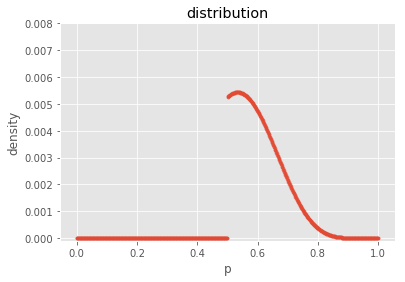

In [13]:
# 3M5-1:

prior = np.concatenate([np.zeros(int(500)), 2*np.ones(int(500))])
posterior, grid = grid_bin(1000, 8, 15, prior)
plt.scatter(grid, posterior, s=10, alpha=0.5)
plt.xlabel('p')
plt.ylabel('density')
plt.title('distribution')
plt.ylim([-0.0001, 0.008])

array([ 0.5005005 ,  0.71271271])

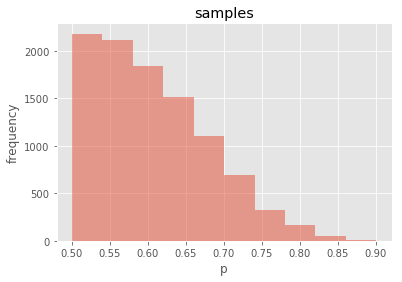

In [19]:
# 3M5-2:
# Take samples:
samples = np.random.choice(grid, 10000, replace=True, p=posterior)

plt.hist(samples, alpha=0.5)
plt.xlabel('p')
plt.ylabel('frequency')
plt.title('samples')

pymc.utils.hpd(samples, 0.1)

Inference = 0.0624505 | Real = 0.0811300333293


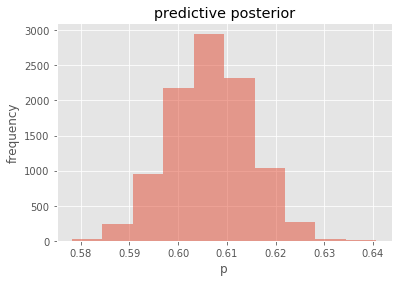

In [18]:
# 3M5-3:

p_samples = grid
p_samples.reshape((p_samples.size, 1))
results_samples = np.random.binomial(15, p_samples, (10000, p_samples.size))
predictive_posterior = results_samples.dot(posterior) / posterior.sum() / 15

plt.hist(predictive_posterior, alpha=0.5)
plt.xlabel('p')
plt.ylabel('frequency')
plt.title('predictive posterior')

# binomial(W = 8, T = 15, p = 0.7)
print("Inference =", (results_samples == 8).mean(), "| Real =", ss.binom.pmf(8, 15, 0.7))

In [22]:
# 3M5-4:

p_samples = grid
p_samples.reshape((p_samples.size, 1))
results_samples = np.random.binomial(9, p_samples, (10000, p_samples.size))

# binomial(W = 6, T = 9, p = 0.7)
print("Inference =", (results_samples == 6).mean(), "| Real =", ss.binom.pmf(6, 9, 0.7))

Inference = 0.0997667 | Real = 0.266827932


0.0997667